In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [5]:
# Load the dataset
data = pd.read_csv(r"D:\ocean anamoly\ohc_levitus_climdash_seasonal.csv")

# Check the first few rows of the dataset
data.head()


,Year,month,heat content anomaly (10^22 Joules)
0,1955,6,-0.112888
1,1956,6,-4.435912
2,1957,6,-5.581200
3,1958,6,-1.357916
4,1959,6,-0.125907


In [6]:
# Extract features and target variable
X = data[['Year', 'month']]  # Features (Year and month)
y = data['heat content anomaly (10^22  Joules)']  # Target variable (Heat content anomaly)

# Convert 'Year' into cyclical features using sine and cosine transformations
X['year_sin'] = np.sin(2 * np.pi * X['Year'] / X['Year'].max())  # Sine transformation
X['year_cos'] = np.cos(2 * np.pi * X['Year'] / X['Year'].max())  # Cosine transformation

# Drop 'Year' and 'month' columns to avoid redundancy
X = X.drop(['Year', 'month'], axis=1)


In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [9]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)


In [10]:
# Calculate the Mean Absolute Error (MAE) and R-squared score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Absolute Error: 1.192889792857142
R-squared: 0.9005273485286134


In [11]:
# Print the first 10 actual and predicted values
for i in range(10):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")


Actual: 1.487195, Predicted: -0.4042344399999998
Actual: -0.112888, Predicted: -4.413893559999995
Actual: 7.580072, Predicted: 6.887069740000011
Actual: -0.125907, Predicted: -2.2400686399999974
Actual: 10.336976, Predicted: 9.057297949999997
Actual: -3.276274, Predicted: -2.8810049700000007
Actual: -3.65106, Predicted: -3.3720214800000026
Actual: 0.316734, Predicted: 0.6540053600000003
Actual: 5.638433, Predicted: 5.330129729999998
Actual: -3.258875, Predicted: -4.322743960000008


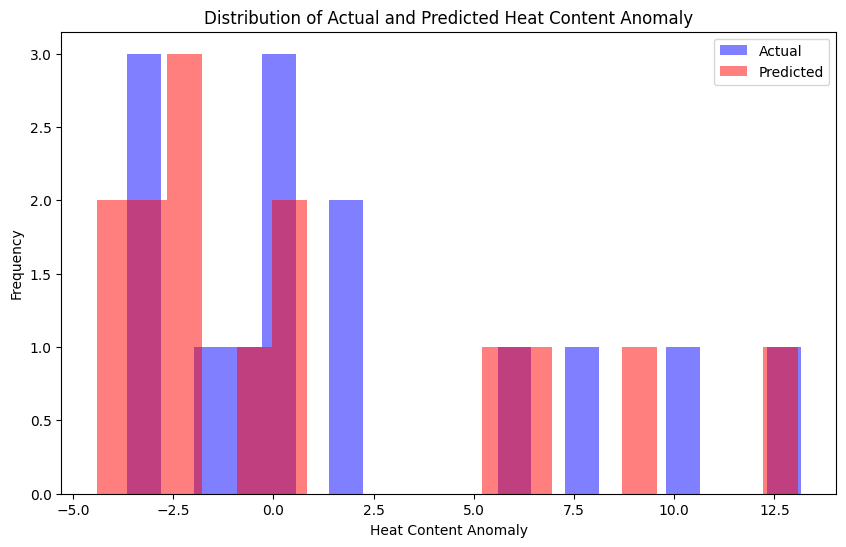

In [13]:
# Plot distribution of actual and predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, alpha=0.5, label='Actual', color='blue')
plt.hist(y_pred, bins=20, alpha=0.5, label='Predicted', color='red')
plt.xlabel('Heat Content Anomaly')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Heat Content Anomaly')
plt.legend()
plt.show()


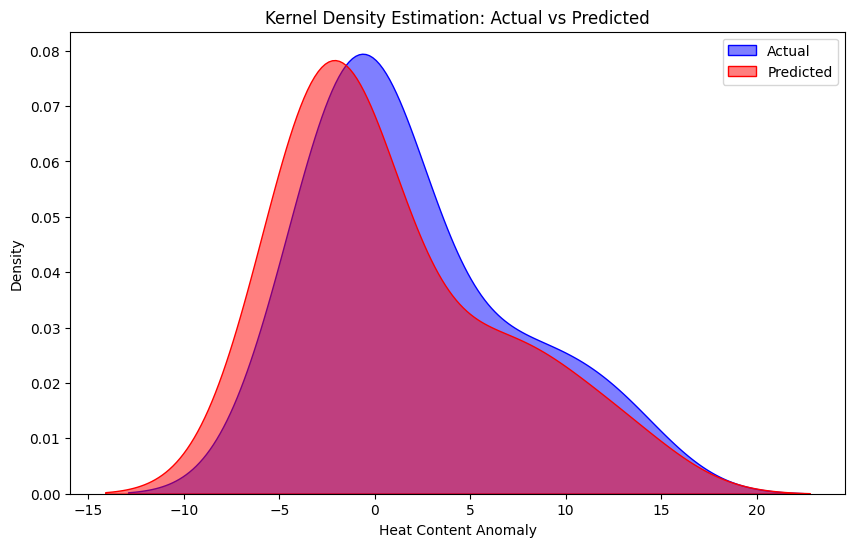

In [14]:
import seaborn as sns

# Plot curve distribution of actual and predicted values
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, color='blue', label='Actual', fill=True, alpha=0.5)
sns.kdeplot(y_pred, color='red', label='Predicted', fill=True, alpha=0.5)
plt.xlabel('Heat Content Anomaly')
plt.ylabel('Density')
plt.title('Kernel Density Estimation: Actual vs Predicted')
plt.legend()
plt.show()
